### Installing and Importing Libraries

In [1]:
# Installing libraries
!pip install matplotlib
!pip install numpy
!pip install pillow
!pip install tensorflow
!pip install opencv-python

In [2]:
# Importing in libraries

import matplotlib.pyplot as plt # Data Visualisation / Image Visualisation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # Reading in our .png files
import numpy as np # Math + Linear Algebra
import os 

# Tensorflow is a renowned Deep Learning library
# We will be using it to train our Convolutional Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers


### Loading the Data

In [3]:
# chinese_mnist_df.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('chinese_mnist.csv')

# Check number of rows and columns
df.shape

(15000, 5)

In [4]:
# Top 5 rows of our dataset
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


### Loading our Image Data

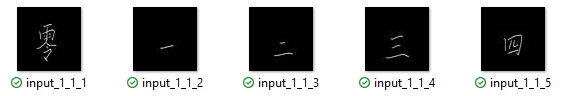

To load our images from our folder, we need to put the word "input" and the columns "suite_id", "sample_id", and "code" together.

In [5]:
# Getting the values of suite_id, sample_id and code as a single array
filename = df[['suite_id', 'sample_id', 'code']].values

# You can start to see how we will get our png file names using these values
filename[:5]

array([[ 1,  1, 10],
       [ 1, 10, 10],
       [ 1,  2, 10],
       [ 1,  3, 10],
       [ 1,  4, 10]], dtype=int64)

In [6]:
# Now we can get our images by specifying the file path 
# cv2.imread() will read our images from our file path
images = [ cv2.imread(f"./data/input_{suite_id}_{sample_id}_{code}.jpg", cv2.IMREAD_GRAYSCALE) for suite_id, sample_id, code in filename ]

# Now we are getting our labels to our characters (e.g. )
labels = [ x - 1 for x in df['code'].values ]

### Visualising our Image Data

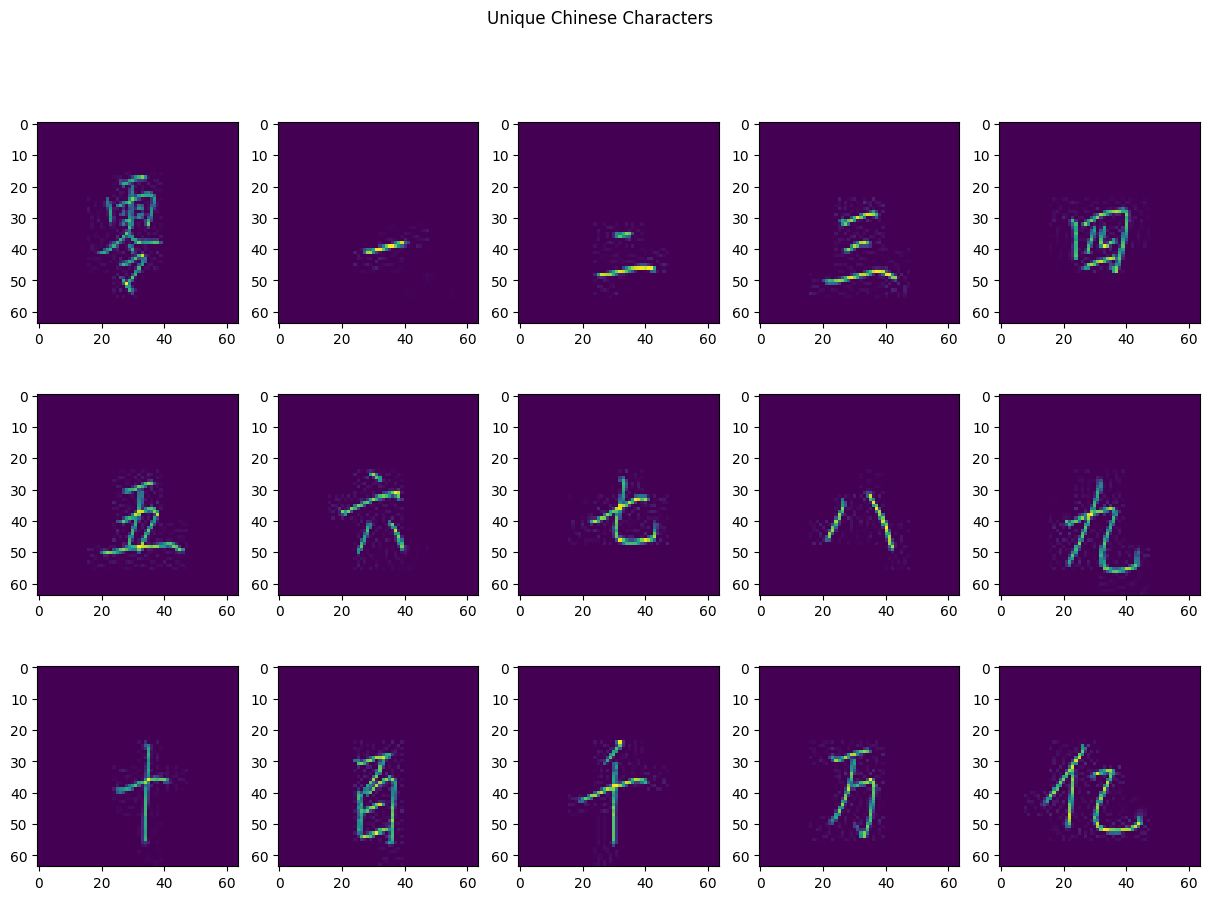

In [7]:
def display_characters(image_data, labels):
    
    # Indexes for each unique character
    index = [list(labels).index(x) for x in np.unique(labels)]
    
    # Create our figure of size 3x5
    fig, ax = plt.subplots(3, 5, figsize=(15, 10))
    
    # Plot our images
    for i, axes in zip(index, ax.ravel()):
        axes.imshow(image_data[i])
    
    fig.suptitle("Unique Chinese Characters")
    
    plt.show()
    

    
display_characters(images, df['code'])

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X = np.array(images).reshape(15000, 4096)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, # 70% training data, 30% test data
                                                    stratify=y, # Equal proportion of (1, 2, 3...) in train and test set
                                                    random_state=42) # random_state=42 basically fixes our results

In [9]:
print(f"Train set and labels shape: {X_train.shape, y_train.shape}")
print(f"test set and labels shape: {X_test.shape, y_test.shape}")

Train set and labels shape: ((10500, 4096), (10500,))
test set and labels shape: ((4500, 4096), (4500,))


### Scaling our data

In [10]:
X_train = X_train / 255
X_test = X_test / 255

### Categorical Encoding on our labels

In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building our Neural Network Model

In [73]:
# Creating our neural network using keras
# For this case, we will be using a NN with 5 layers (Input, 3 Hidden, Output)
model_nn = Sequential()

# Input Layer
model_nn.add(keras.layers.Input(shape=(4096)))

# Hidden Layers
model_nn.add(layers.Dense(512, activation='relu')) 
model_nn.add(layers.Dense(128, activation='relu')) 
model_nn.add(layers.Dense(256, activation='relu')) 

# Output Layer
model_nn.add(layers.Dense(15, activation='softmax')) # Output layers

model_nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               2097664   
                                                                 
 dense_41 (Dense)            (None, 128)               65664     
                                                                 
 dense_42 (Dense)            (None, 256)               33024     
                                                                 
 dense_43 (Dense)            (None, 15)                3855      
                                                                 
Total params: 2,200,207
Trainable params: 2,200,207
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compiling our model
model_nn.compile(optimizer="Adam",
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Training Our Model

In [75]:
# Hyperparameters
NUM_EPOCHS = 25
BATCH_SIZE = 32

history = model_nn.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/25
263/263 [==============================] - 1s 4ms/step - loss: 1.6020 - accuracy: 0.4810 - val_loss: 0.9672 - val_accuracy: 0.6667
Epoch 2/25
263/263 [==============================] - 1s 2ms/step - loss: 0.6107 - accuracy: 0.7921 - val_loss: 0.7467 - val_accuracy: 0.7505
Epoch 3/25
263/263 [==============================] - 1s 2ms/step - loss: 0.3061 - accuracy: 0.8945 - val_loss: 0.6583 - val_accuracy: 0.7781
Epoch 4/25
263/263 [==============================] - 1s 2ms/step - loss: 0.1713 - accuracy: 0.9408 - val_loss: 0.8314 - val_accuracy: 0.7605
Epoch 5/25
263/263 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9618 - val_loss: 0.7785 - val_accuracy: 0.7819
Epoch 6/25
263/263 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9775 - val_loss: 0.8177 - val_accuracy: 0.7910
Epoch 7/25
263/263 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9689 - val_loss: 0.8762 - val_accuracy: 0.7924
Epoch 

### Evaluating Model Performance

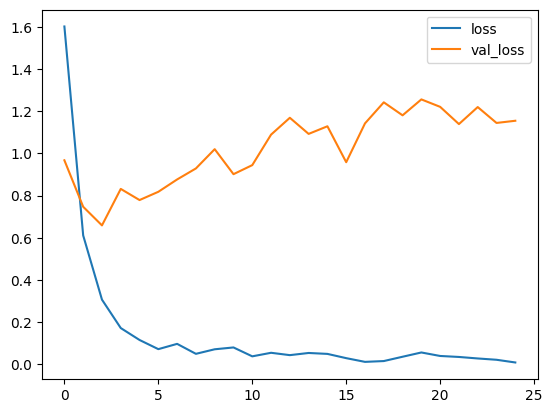

In [79]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

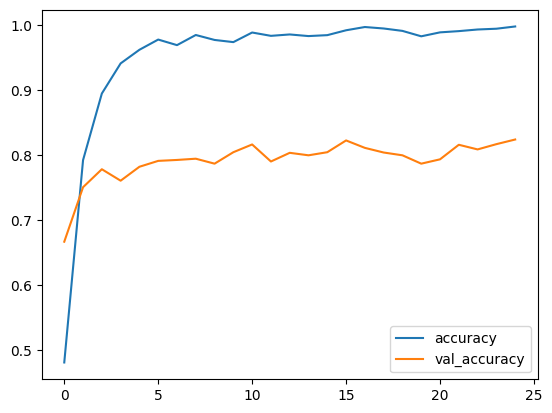

In [80]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

plt.show()

In [78]:
model_nn.evaluate(X_test, y_test)

141/141 [==============================] - 0s 3ms/step - loss: 1.0516 - accuracy: 0.8387


[1.051594614982605, 0.8386666774749756]

Our model achieved an accuracy of 83% on the test set! Not too bad but not that good either :O

### Running predictions on our model!

In [101]:
df["character"].unique()

array(['九', '十', '百', '千', '万', '亿', '零', '一', '二', '三', '四', '五', '六',
       '七', '八'], dtype=object)

In [107]:
df[['character', 'code']][df['code'] == 14]

,character,code
4000,万,14
4001,万,14
4002,万,14
4003,万,14
4004,万,14
...,...,...
4995,万,14
4996,万,14
4997,万,14
4998,万,14


In [109]:
# Mapping our numbers to our chinese characters
chinese_dict = {
    9 : '九', 10 : '十', 11 : '百', 12 : '千', 
    13 : '万', 14 : '亿', 0 : '零', 1 : '一', 
    2 : '二', 3 : '三', 4 : '四', 5 : '五', 
    6 : '六', 7 : '七', 8 : '八'}

1/1 [==============================] - 0s 15ms/step
Prediction: 八
Probability: 1.0


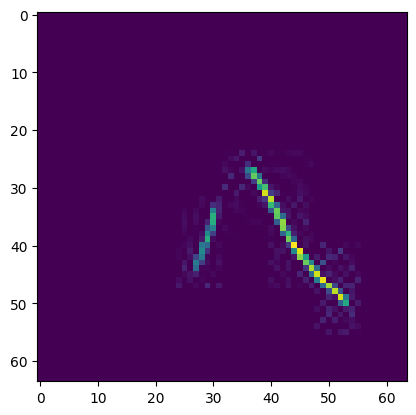

In [148]:
def predict():
    
    # Get a random index in the test dataset
    x = np.random.randint(X_test.shape[0])
    
    # Plot the image from the test set
    plt.imshow(X_test[x].reshape(64, 64))
    
    # Using our model, predict the character the image is showing
    pred = model_nn.predict(X_test[x].reshape(1, 4096))
    
    # Print prediction & probability
    print(f"Prediction: {chinese_dict[pred.argmax()]}")
    print(f"Probability: {pred[0][pred.argmax()]}")

predict()